# Descendent gradient 
Implementation from scratch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import random
import functools

## Dataset 
The dataset consist in a not-sorted set of pairs $\{x_i, y_i\}$

In [ ]:


def sort_by_col(mat, i):
    return mat[mat[:, i].argsort()]


points = np.genfromtxt("data.csv", delimiter=",")
print(points.shape)
points = sort_by_col(points, 0)

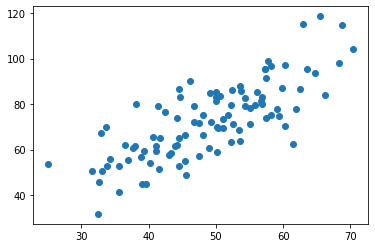

In [150]:
plt.scatter(points[:, 0], points[:, 1])
plt.show()

# Implementation and use of the gradient
We compute the gradient of a function $f(x_0, \dots, x_{n-1}$ by using the definition of the partial derivative

$$ \frac{\partial f}{\partial x_i} = \lim_{h\rightarrow 0} 
\frac{f(x_0, \dots,x_i + h, \dots, x_{n-1}) - f(x_0, \dots, x_{n-1})}{h} $$

We just make $h \rightarrow 0$ .

In [77]:
def partial_derivative_quotient(f, v, i, h):
    w = np.array([v_j + (h if i == j else 0) for j, v_j in enumerate(v)])
    return (f(w) - f(v)) / h

def estimate_gradient(f, v, h=0.00001):
    return np.array([partial_derivative_quotient(f, v, i, h) 
                     for i, _ in enumerate(v)])

In [154]:
def f(v):
    x, y = v[0], v[1]
    return x**2 + y**2

def df(v):
    x, y = v[0], v[1]
    return np.array([2*x, 2*y])


v = [random.randint(-10, 10) for _ in range(2)]
print(f'v = {v}')
print(f'f(v) = {f(v)}')
print(f'df(v) = {df(v)}')
print(f'df(v) (by limit) = {estimate_gradient(f, v)}')


v = [-5, 1]
f(v) = 26
df(v) = [-10   2]
df(v) (by limit) = [-9.99999  2.00001]


In [108]:

def safe(f, *args, **kwargs):
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
    return safe_f

def descendent_gradient(target_fn, gradient_fn,  theta_0, 
                        lr=0.001, tol=0.001, max_iter=1000):
    '''target_fn returns the error for the entire dataset'''
    theta = theta_0
    value = target_fn(theta)
    for epoch in range(max_iter):
        theta = theta - lr*gradient_fn(theta)
        next_v = target_fn(theta)
        if abs(value - next_v) < tol:
            return theta
        value = next_v
    print('MAX ITER REACHED')
    return theta  # max iterations reached

def mse(theta, x, y):
    return sum((y_i - theta.dot(x_i)) ** 2 for x_i, y_i in zip(x, y)) / x.shape[0]

In [157]:
X, y = points[:, 0], points[:, 1]

# add bias to X
m = len(X)
one_column = np.ones((m, 1))
X_with_bias = np.c_[one_column, X]
print(X_with_bias.shape)
print(X_with_bias[:5])

(100, 2)
[[ 1.         25.12848465]
 [ 1.         31.588117  ]
 [ 1.         32.50234527]
 [ 1.         32.66904376]
 [ 1.         32.94047994]]


In [162]:
theta_0 = np.array([random.randint(-10, 10) for _ in range(2)])
loss = functools.partial(mse, x=X_with_bias, y=y)
loss(theta_0)

787.5466436213371

In [163]:
grad_loss = functools.partial(estimate_gradient, loss)
grad_loss(theta_0)

array([  50.36327473, 2593.16669228])

In [164]:
theta_update = descendent_gradient(loss, grad_loss, theta_0, 
                                   lr=0.00001, tol=0.000001, max_iter=10000)

MAX ITER REACHED


In [165]:
print(f'loss({theta_update}) = {loss(theta_update)}')

loss([0.04998523 1.47850466]) = 112.63810805104391


In [167]:
y_pred = [theta_update.dot(x) for x in X_with_bias]
print(y[:5])
print(y_pred[:5])

[53.45439421 50.39267014 31.70700585 45.57058882 67.17065577]
[37.20256695355439, 46.7531635030627, 48.104854265006196, 48.35131876567564, 48.75263842218328]


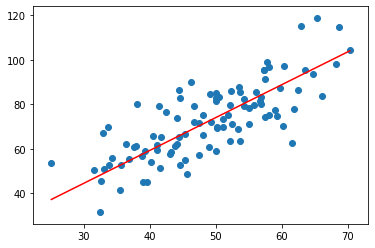

In [171]:
plt.plot()
plt.plot(X, y_pred, color='red')
plt.scatter(X, y)
plt.show()